<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/04gate/05entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 699.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.8 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## 量子もつれ
CXゲートを使って量子もつれを作ります。2量子ビット準備します。

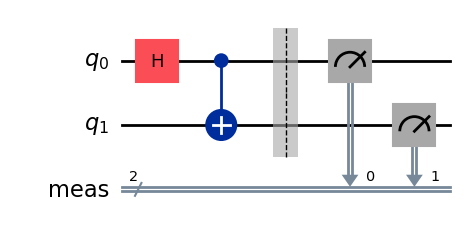

In [8]:
# 2量子ビット準備する
qc = QuantumCircuit(2)

# Hゲートを適用
qc.h(0)

# CXゲートを適用
qc.cx(0,1)

# 測定をして計算結果を確定する必要がある
qc.measure_all()

qc.draw("mpl")

Counts(ideal): {'11': 522, '00': 502}


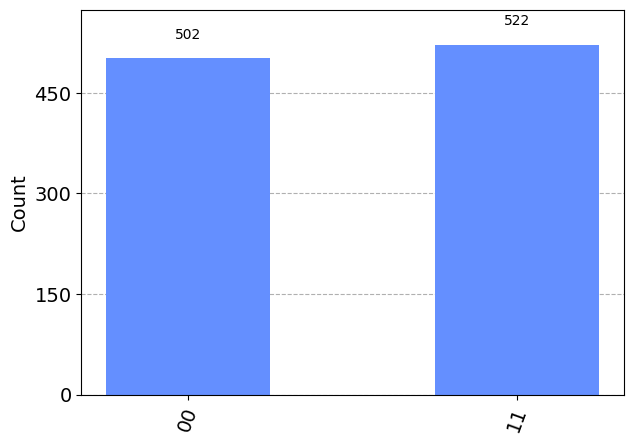

In [10]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts(ideal):', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

今回は00と11に絞り込めました。

## 例題5 足し算
量子ゲートを組み合わせて足し算ができます。今回は普通の足し算と量子もつれを使った足し算を行います。通常の計算機ではこれらを別々に行います。今回は2進数で行いますので、1+1=2は1+1=10と表現します。

0 + 0 = 0  
1 + 0 = 1  
0 + 1 = 1  
1 + 1 = 10  

量子回路で同じことをしてみます。4量子ビット準備し、上の2量子ビットが式の左側の足し算部分、下の2量子ビットが式の右側の答え部分とします。答えは桁上がりがあるので、2量子ビット必要です。


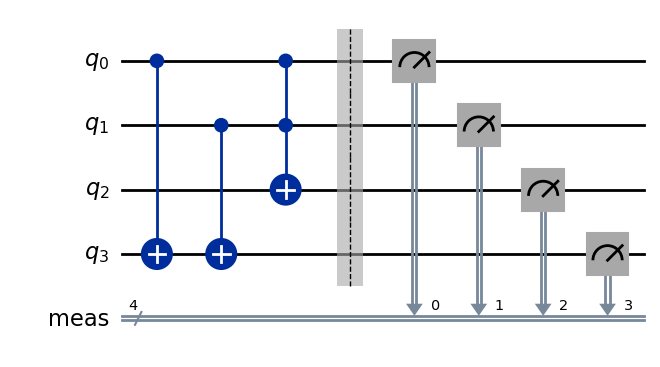

In [11]:
# 4量子ビット準備する
qc = QuantumCircuit(4)

# 1の桁の足し算
qc.cx(0,3)
qc.cx(1,3)

# 桁上がり
qc.ccx(0,1,2)

# 測定をして計算結果を確定する必要がある
qc.measure_all()

qc.draw("mpl")

Counts(ideal): {'0000': 1024}


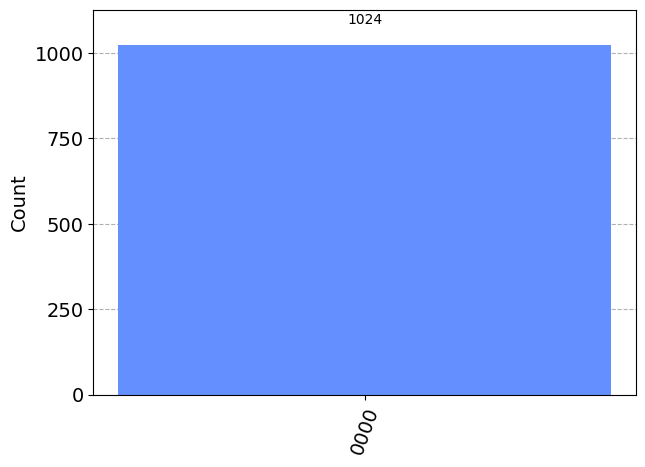

In [12]:
result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts(ideal):', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

0000となりました。IBMの場合、逆から読む必要があり、0 + 0 = 00と読みます。

次に1+0を実行してみます。 Xゲートを使って0番目の量子ビットの値を1にします。

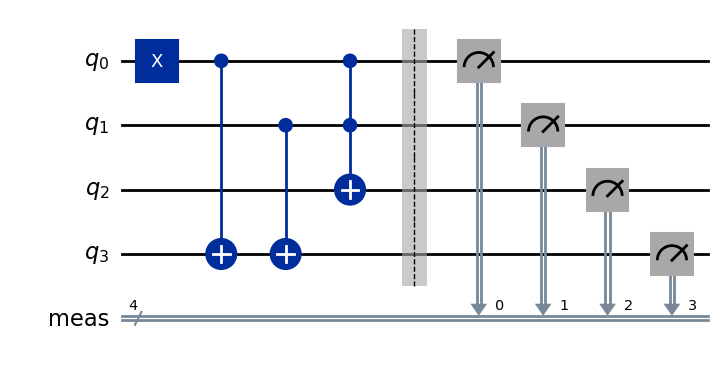

In [13]:
# 4量子ビット準備する
qc = QuantumCircuit(4)

# Xゲートを適用
qc.x(0)

# 1の桁の足し算
qc.cx(0,3)
qc.cx(1,3)

# 桁上がり
qc.ccx(0,1,2)

# 測定をして計算結果を確定する必要がある
qc.measure_all()

qc.draw("mpl")

Counts(ideal): {'1001': 1024}


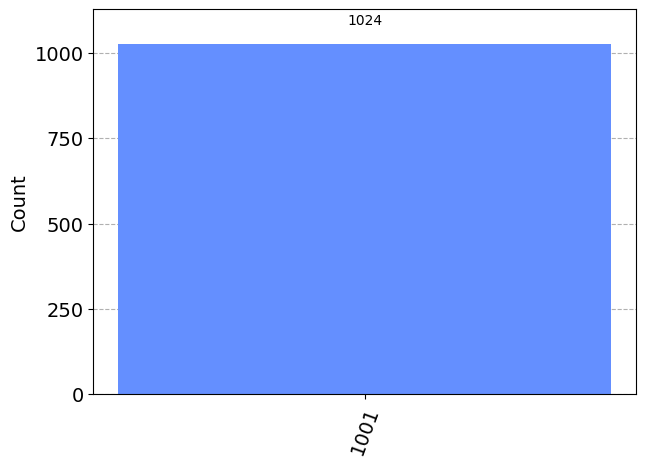

In [14]:
result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts(ideal):', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

答えは1001となりました。 1 + 0 = 01となりました。

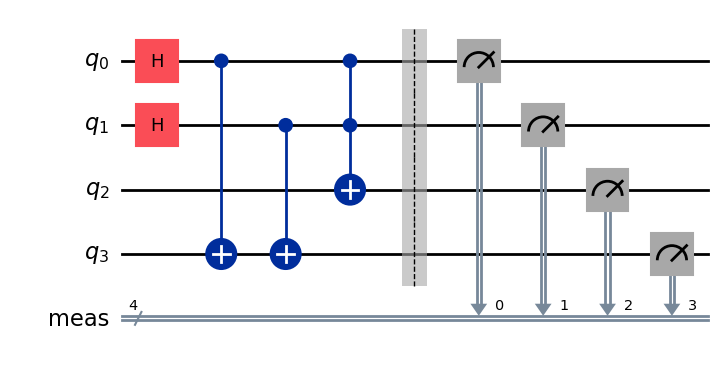

In [15]:
# 4量子ビット準備する
qc = QuantumCircuit(4)

# Hゲートを適用
qc.h(0)
qc.h(1)

# 1の桁の足し算
qc.cx(0,3)
qc.cx(1,3)

# 桁上がり
qc.ccx(0,1,2)

# 測定をして計算結果を確定する必要がある
qc.measure_all()

qc.draw("mpl")

Counts(ideal): {'1001': 278, '0000': 259, '0111': 246, '1010': 241}


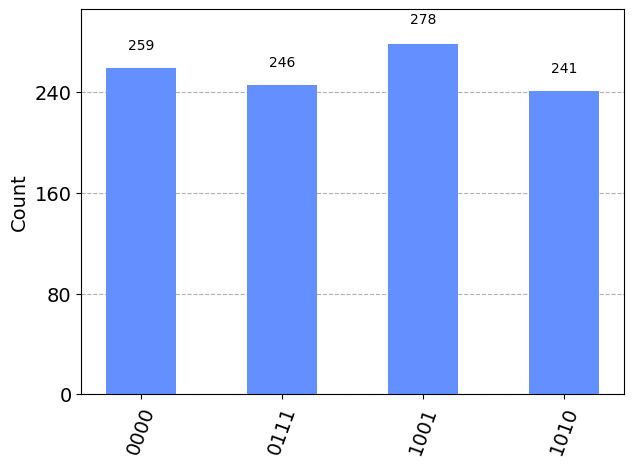

In [16]:
result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts(ideal):', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)

どうでしょう？

0 + 0 = 00
1 + 1 = 10
1 + 0 = 01
0 + 1 = 01

の4種類が1つの式でできました。計算は1回につき1種類しか出せませんが、16通りの答えから4通りの正解だけを抜き出すことができました。このような量子もつれをより複雑に利用することによって様々な計算をすることができます。